In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


### Leukemia Case Study

https://newonlinecourses.science.psu.edu/stat501/node/374/

To illustrate, consider data published on n = 27 leukemia patients. The data (leukemia_remission.txt) has a response variable of whether leukemia remission occurred (REMISS), which is given by a 1.

In [2]:
ex = pd.read_csv("./data/leukemia_remission.txt", sep='\t')
ex.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


In [3]:
features_ = ex.columns.values.tolist()
features_ = [i for i in features_ if i not in ['REMISS']]
features_

['CELL', 'SMEAR', 'INFIL', 'LI', 'BLAST', 'TEMP']

In [4]:
y=ex['REMISS']
X= sm.add_constant(ex[features_])

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Logistic Regression Model Fitting

In [5]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.399886
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.3718
Time:                        18:19:27   Log-Likelihood:                -10.797
converged:                       True   LL-Null:                       -17.186
                                        LLR p-value:                   0.04670
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2581     74.965      0.857      0.391     -82.670     211.187
CELL          30.8301     52

Above are the estimates from the regression coefficent with the p-values based on the __Wald test__:
$\begin{equation*} Z=\frac{\hat{\beta}_{i}}{\textrm{s.e.}(\hat{\beta}_{i})} \end{equation*}$ that indicates the __test of significance for individual coefficient in a logistic regression__. 

The _bone marrow leukemia cells_ `LI` has the __smallest p-value__ and so appears to be the __closest to a significant predictor of remission occuring__. 

After looking at various subsets of the data, we find that a good model is one which only includes the labeling index as a predictor:


In [6]:
y_data =ex['REMISS']
x_data= sm.add_constant(ex['LI'])

model = sm.Logit(y_data, x_data)
model_fit = model.fit()

print(model_fit.summary())

cov = model_fit.cov_params()
std_err = np.sqrt(np.diag(cov))
z_values = model_fit.params / std_err

Optimization terminated successfully.
         Current function value: 0.482833
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.2414
Time:                        18:19:32   Log-Likelihood:                -13.036
converged:                       True   LL-Null:                       -17.186
                                        LLR p-value:                  0.003967
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7771      1.379     -2.740      0.006      -6.479      -1.075
LI             2.8973      1.

Regression Equation

P(1)  =  exp(Y')/(1 + exp(Y'))


Y' = -3.78 + 2.90 LI

used seaborn to plot a regression:

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


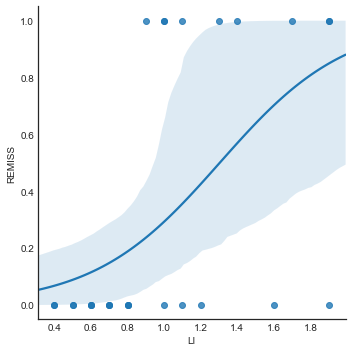

In [7]:
sns.lmplot(x="LI", logistic=True, y="REMISS", data=ex)
plt.show()

#### Odds Ratio
The odds ratio for LI of 18.1245 is calculated as 
exp
(
2.89726
)


In [8]:
np.exp(model_fit.params)

const     0.022888
LI       18.124486
dtype: float64

The odds ratio for LI of 18.1245 is calculated as exp(2.89726).

* At LI=0.9, the estimated odds of leukemia remission is exp{−3.77714+2.89726∗0.9}=0.310.
* At LI=0.8, the estimated odds of leukemia remission is exp{−3.77714+2.89726∗0.8}=0.232.

In [9]:
model_fit.conf_int

<bound method LikelihoodModelResults.conf_int of <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001F814E7EBA8>>

In [10]:
model2 = smf.ols(formula='REMISS~ LI ', data = ex).fit()
print(sm.stats.anova_lm(model2))

            df    sum_sq   mean_sq          F    PR(>F)
LI         1.0  1.762466  1.762466  10.397945  0.003498
Residual  25.0  4.237534  0.169501        NaN       NaN


## Poisson Sampling

https://newonlinecourses.science.psu.edu/stat504/node/57/

> QUESTION: What is the most likely mean number of goals scored; that is, what is the most likely value of the unknown parameter λ given the data x?

In [11]:
soccer = pd.read_csv("./data/world_cup.txt",sep='\t')
#soccer.Freq = soccer.Freq.astype(int)
soccer.head()

,Goals,Freq
0,0,23
1,1,37
2,2,20
3,3,11
4,4,2


$\begin{align} \bar{x} &= \dfrac{1}{95}\sum\limits_{i=1} x_i\\ &= \dfrac{1}{95} (0\times 23+1\times 37+2\times 20+3\times 11+4\times 2+5\times 1+6\times 0+ 7\times 0+ 8 \times 1)\\ &= \dfrac{131}{95}\\ &= 1.38\\ \end{align}$

__Thus, $\hat{\lambda}=1.38$  goals per first round matches.__

In [12]:
# compute the sample size
n = soccer.Freq.sum()

# compute the same mean
smean = (1/n) * (soccer.Goals * soccer.Freq).sum()
smean

1.3789473684210527

$[1.38-1.96\sqrt{1.38/95},1.38+1.96\sqrt{1.38/95}]=[1.14,1.62]$

and we are 95% confident that the mean number of goals scored by a team during the first round match-ups will be somewhere between 1.14 and 1.62. 


under this Poisson model with $\hat{\lambda}=1.38$ , the expected probability of scoring 2 goals is

In [13]:
## compute the Poisson probability for X=1, P(X=1) 
poisson = stats.distributions.poisson
poisson.pmf(2, smean)

0.23943969582948485

In [14]:
## Poisson probabilities for X=0, 1, ..., 8 with LAMBDA=smean 
## these are estimates of cell probabilities 

pihat = poisson.pmf([0,1,2,2,3,4,5,6,7], smean)

## compute expected frequencies for each cell j, E(Xj)=n pi_j
efreq = n*pihat
soccer['Expected Counts'] = efreq
efreq

array([23.92513364, 32.99150007, 22.7467711 , 22.7467711 , 10.45553338,
        3.60440756,  0.99405766,  0.22845887,  0.04500468])

Here is a summary of these probabilities:

In [15]:
soccer

,Goals,Freq,Expected Counts
0,0,23,23.925134
1,1,37,32.991500
2,2,20,22.746771
3,3,11,22.746771
4,4,2,10.455533
5,5,1,3.604408
6,6,0,0.994058
7,7,0,0.228459
8,8,1,0.045005


## Binomial Likelihood

https://newonlinecourses.science.psu.edu/stat504/node/58/

### PSU  High Risk Drinking Example 

![](https://newonlinecourses.science.psu.edu/stat504/sites/onlinecourses.science.psu.edu.stat504/files/lesson02/high_risk_drinking/index.png)

First define the likehihood function for binomial sample with:
* N = 1315
* X = 630
* p = unknown parameter

>QUESTION: What is the true population proportion of students who are high-risk drinkers at Penn State?

Thus for our example, assuming the Binomial distribution, our "best" guess estimate of the true proportion of students who are high-risk drinkers is

In [16]:
630/1315

0.4790874524714829

Here are also the likelihood and loglikelihood graphs for our example. We can see that the peak of the likelihood is at the proportion value equal to 0.48

In [17]:
dbinom = stats.distributions.binom

def likelhd(p):
    return dbinom(630, 1315, p)

1-proportion Hypothesis test, Approximate 95% confidence interval, and MLE

H0: p=0.5 vs. Ha: p is not equal 0.5 

In [18]:
630/1315

0.4790874524714829

__when the sample size is small, we can do an exact test via:__

In [19]:
sm.stats.binom_test(630, 1315, 0.5)

0.13642445794149205

The statistic z = -1.45 with two sided p-value of 0.136. __Thus we do not have a very strong evidence that the proportion of high-risk drinkers is different from 50%; i.e., do not reject the null hypothesis.__

In [20]:
sm.stats.proportion_confint(630, 1315)

(0.45208675254889413, 0.5060881523940716)

This interval is known as the Wald confidence interval.

For our example, the 95% CI is 0.48 ± 1.96 × 0.014 = (0.453, 0.507). We can be 95% confident that the true population proportion of students high-risk drinkers is between 0.454 and 0.506.

### Lesson 2: One-Way Tables and Goodness-of-Fit Test
https://newonlinecourses.science.psu.edu/stat504/node/61/

In [23]:
x = [3,7,5,10,2,3] 
stats.chisquare(x)

Power_divergenceResult(statistic=9.200000000000001, pvalue=0.1013478563301067)

The p-values are P(χ25 ≥ 9.2) = .10. Given these p-values, __with the critical value or Type I error of α=0.05, we fail to reject the null hypothesis__. ___there is a moderate evidence that the dice is fair.___

 

In [25]:
stats.chi2.cdf(x, 5)

array([0.30001416, 0.77935969, 0.58411981, 0.92476475, 0.15085496,
       0.30001416])

In [26]:
sm.stats.proportions_chisquare(x, 6)

(55.199999999999996, 1.1873589120305499e-10, (array([[ 3,  3],
         [ 7, -1],
         [ 5,  1],
         [10, -4],
         [ 2,  4],
         [ 3,  3]]), array([[5., 1.],
         [5., 1.],
         [5., 1.],
         [5., 1.],
         [5., 1.],
         [5., 1.]])))

## Chi-square Test of Independence


https://newonlinecourses.science.psu.edu/stat504/node/74/

https://newonlinecourses.science.psu.edu/stat504/sites/onlinecourses.science.psu.edu.stat504/files/lesson03/VitaminC/index.R

In [55]:
vitamin = pd.DataFrame(columns=['Cold', "No Cold"], index=['Placebo', 'Vitamins'])
vitamin.loc['Placebo'] = [31, 109]
vitamin.loc['Vitamins'] = [17, 122]
vitamin

,Cold,No Cold
Placebo,31,109
Vitamins,17,122


This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. 

scipy.stats.chi2_contingency - https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html

In [80]:
chi2, p, dof, ex = stats.chi2_contingency(vitamin)
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

print("\nObserved: ")
print(vitamin.values.tolist())

print("\nExpected: ")
print(ex)


X-squared:  4.140678921380519
p-value  :  0.041864375625494867
degree of f:  1

Observed: 
[[31, 109], [17, 122]]

Expected: 
[[ 24.08602151 115.91397849]
 [ 23.91397849 115.08602151]]


__The test for independence yields χ2 = 4.814 and the p-value=0.0283. The conclusion here would be that there is strong evidence against the null hypothesis of independence. The statistic χ2 = 4.814 means that the evidence against the null is strong.__ 
 
Yates' continuity correction. This correction subtracts 0.5 from a difference between the observed and the expected counts in the formula for the χ2 statistic, e.g., {oij-nij}-0.5. It is used in situations when there are cells with small expected counts (e.g., less than 5) in order to better approximate exact inference tests. 

__Peasron Chi-squared test WITHOUT Yates' continuity correction__

In [81]:
stats.chi2_contingency(vitamin, correction=False)

(4.81141264632079,
 0.028271860246822603,
 1,
 array([[ 24.08602151, 115.91397849],
        [ 23.91397849, 115.08602151]]))

Chi-square test using the __log-likelihood ratio__ `G-test` instead of the _Pearson chi-squared statisitc_

In [105]:
stats.chi2_contingency(vitamin, lambda_="log-likelihood", correction=False)

(4.871696824016707,
 0.027300643711938043,
 1,
 array([[ 24.08602151, 115.91397849],
        [ 23.91397849, 115.08602151]]))

___χ^2 = 4.8114 and G2 = 4.8717, with df=1, indicate strong evidence for rejecting the independence model.___

__Fisher Exact Test__

In [106]:
oddsratio, pvalue = stats.fisher_exact(vitamin)
print("Odds Ratio: ", oddsratio)
print("p-value   : ", pvalue)

Odds Ratio:  2.0410145709660013
p-value   :  0.03849249137522522


In [102]:
stats.contingency.expected_freq(vitamin)

array([[ 24.08602151, 115.91397849],
       [ 23.91397849, 115.08602151]])

In [108]:
stats.power_divergence(vitamin)

Power_divergenceResult(statistic=array([4.08333333, 0.73160173]), pvalue=array([0.04330814, 0.3923645 ]))

In [107]:
stats.power_divergence(vitamin, lambda_="log-likelihood")

Power_divergenceResult(statistic=array([4.14329266, 0.7319884 ]), pvalue=array([0.04179979, 0.39223943]))

In [139]:
y_data =vitamin.Cold
x_data= sm.add_constant(vitamin['No Cold'])

model2 = sm.Logit(y_data, x_data)
model2_fit = model2.fit()

print(model2_fit.summary())

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ValueError: endog must be in the unit interval.

Placebo     31
Vitamins    17
Name: Cold, dtype: int64

In [151]:
sm.stats.proportions_chisquare(vitamin.Cold,vitamin.Cold)

(nan, nan, (array([[31,  0],
         [17,  0]], dtype=int64), array([[31.,  0.],
         [17.,  0.]])))

In [ ]:
stats.chi2.cdf()

In [120]:
print(stats.chi2.pdf(vitamin, df=1))

[[1.32942778e-08 8.18742912e-26]
 [1.96871345e-05 1.16350098e-28]]


In [137]:
stats.chi2.(vitamin)

ValueError: alpha must be between 0 and 1 inclusive